### Importing stuffs

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import math

#### You are to implement following edge detectors with thresholds :
(a) Robert's Operator: 12

(b) Prewitt's Edge Detector: 24

(c) Sobel's Edge Detector: 38

(d) Frei and Chen's Gradient Operator: 30

(e) Kirsch's Compass Operator: 135

(f) Robinson's Compass Operator: 43

(g) Nevatia-Babu 5x5 Operator: 12500


### Announcement

* You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.
* Threshold Values listed above are for reference, you can choose your own values if you want.

### Importing image 

In [2]:
lena=cv2.imread('lena.bmp')

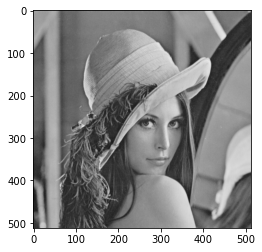

In [3]:
plt.imshow(lena)

In [5]:
def To3D2D(img):
    re_img=np.zeros((img.shape[0],img.shape[1]), dtype=np.int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            re_img[i,j]=img[i,j,0]
    return re_img

### (a) Robert's Operator: 12

In [19]:
def Robert(image,thr):
    img=To3D2D(image)
    L=img.shape[0]
    P=img.shape[1]
    new_img=np.ones((L,P), dtype=np.int)*255
    pad_img=np.pad(img, ((0,1),(1,1)), mode='constant',constant_values=0)
    for l in range(L):
        for p in range(P):
            ll=l
            pp=p+1
            r1=-pad_img[ll,pp]+pad_img[ll+1,pp+1]
            r2=-pad_img[ll,pp]+pad_img[ll+1,pp-1]
            magnitude=(r1**2+r2**2)**(.5)
            if(magnitude>=thr):
                new_img[l,p]=0
    re_img=np.stack((new_img,new_img,new_img), axis = -1)           
            
    return re_img

In [115]:
robert_img_12=Robert(lena,12)

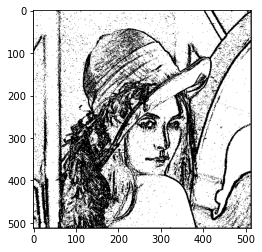

In [116]:
plt.imshow(robert_img_12)

#### Robert's Operator: 30

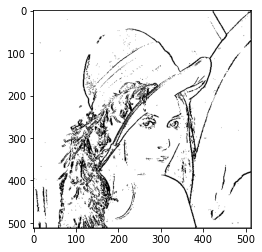

In [44]:
robert_img_30=Robert(lena,30)
plt.imshow(robert_img_30)

### Gradient Edge Detectors

In [41]:
def Gradient_Edge(image,thr,w):
    img=To3D2D(image)
    L=img.shape[0]
    P=img.shape[1]
    new_img=np.ones((L,P), dtype=np.int)*255
    pad_img=np.pad(img, 1, mode='edge')
    
    for l in range(L):
        for p in range(P):
            ll=l+1
            pp=p+1
            p1=(pad_img[ll+1,p]+w*pad_img[ll+1,pp]+pad_img[ll+1,pp+1])-(pad_img[l,p]+w*pad_img[l,pp]+pad_img[l,pp+1])
            p2=(pad_img[l,pp+1]+w*pad_img[ll,pp+1]+pad_img[ll+1,pp+1])-(pad_img[l,p]+w*pad_img[ll,p]+pad_img[ll+1,p])
            g=(p1**2+p2**2)**(.5)
            if(g>=thr):
                new_img[l,p]=0
    re_img=np.stack((new_img,new_img,new_img), axis = -1)           
    return re_img

### (b) Prewitt's Edge Detector: 24

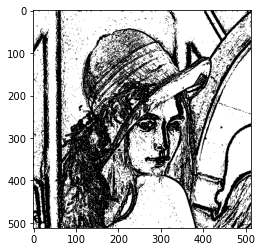

In [46]:
prewitt_img=Gradient_Edge(lena,24,1)
plt.imshow(prewitt_img)

### (c) Sobel's Edge Detector: 38

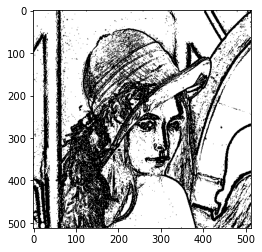

In [47]:
sobel_img=Gradient_Edge(lena,38,2)
plt.imshow(sobel_img)

### (d) Frei and Chen's Gradient Operator: 30

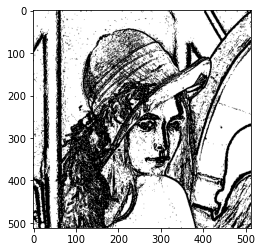

In [48]:
root_2=2**(.5)
frei_chen_img=Gradient_Edge(lena,30,root_2)
plt.imshow(frei_chen_img)

### Compass Operator

In [64]:
def Compass(image,thr,arr):
    img=To3D2D(image)
    L=img.shape[0]
    P=img.shape[1]
    comb=len(arr)
    new_img=np.ones((L,P), dtype=np.int)*255
    pad_img=np.pad(img, 1, mode='edge')
    
    for l in range(L):
        for p in range(P):
            ll=l+1
            pp=p+1
            for k in range(comb):
                k_n=arr[k%8]*pad_img[l,p]+arr[(k+1)%8]*pad_img[l,pp]+arr[(k+2)%8]*pad_img[l,pp+1]\
                +arr[(k+3)%8]*pad_img[ll,pp+1]+arr[(k+4)%8]*pad_img[ll+1,pp+1]\
                +arr[(k+5)%8]*pad_img[ll+1,pp]+arr[(k+6)%8]*pad_img[ll+1,p]\
                +arr[(k+7)%8]*pad_img[ll,p]
                if(k_n>=thr):
                    new_img[l,p]=0
                    break                
    re_img=np.stack((new_img,new_img,new_img), axis = -1)           
    return re_img

### (e) Kirsch's Compass Operator: 135

In [65]:
Kirsch_arr=[-3,-3,5,5,5,-3,-3,-3]

In [66]:
kirsch_img=Compass(lena,135,Kirsch_arr)

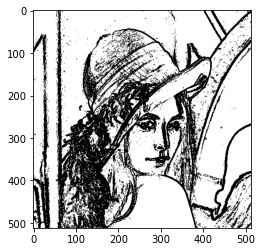

In [67]:
plt.imshow(kirsch_img)

### (f) Robinson's Compass Operator: 43

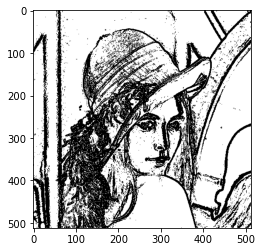

In [68]:
Robinson_arr=[-1,0,1,2,1,0,-1,-2]
robinson_img=Compass(lena,43,Robinson_arr)
plt.imshow(robinson_img)

### (g) Nevatia-Babu 5x5 Operator: 12500

In [90]:
Nevatia_30= np.array([[100 ,100 ,100 ,100 , 100]
                    ,[100 ,100 ,100 ,78  , -32]
                    ,[100 ,92  ,0   ,-92 ,-100]
                    ,[32  ,-78 ,-100,-100,-100]
                    ,[-100,-100,-100,-100,-100]])
Nevatia_0= np.array([[100 ,100 ,100 ,100 , 100]
                    ,[100 ,100 ,100 ,100 , 100]
                    ,[  0 ,   0,   0,   0,   0]
                    ,[-100,-100,-100,-100,-100]
                    ,[-100,-100,-100,-100,-100]])
Nevatia_n90=np.flip(Nevatia_0.T)
Nevatia_n30=np.flip(Nevatia_m,1)
Nevatia_60=Nevatia_m.T
Nevatia_n60=np.flip(Nevatia_m,0).T
Nevatia_M_list=[Nevatia_30,Nevatia_0,Nevatia_n90,Nevatia_n30,Nevatia_60,Nevatia_n60]

In [113]:
def Nevatia_Babu(image,thr,arr_list):
    
    shift=2
    img=To3D2D(image)
    L=img.shape[0]
    P=img.shape[1]
    new_img=np.ones((L,P), dtype=np.int)*255
    pad_img=np.pad(img, shift, mode='edge')
    
    for l in range(L):
        for p in range(P):
            ll=l+shift
            pp=p+shift
            for k in range(len(arr_list)):
                count=0
                for r in range(-shift,shift+1):
                    for c in range(-shift,shift+1):
                        count=count+(arr_list[k][r+shift,c+shift]*pad_img[ll+r,pp+c])
                if(count>=thr):
                    new_img[l,p]=0
                    break
    re_img=np.stack((new_img,new_img,new_img), axis = -1)           
    return re_img        

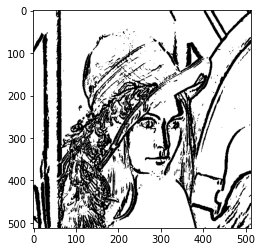

In [114]:
Nev_babu_img=Nevatia_Babu(lena,12500,Nevatia_M_list)
plt.imshow(Nev_babu_img)

In [117]:
cv2.imwrite('HW9-a(robert 12).jpg', robert_img_12)
cv2.imwrite('HW9-a(robert 30).jpg', robert_img_30)
cv2.imwrite('HW9-b(prewitt 24).jpg', prewitt_img)
cv2.imwrite('HW9-c(sobel 38).jpg', sobel_img)
cv2.imwrite('HW9-d(frei_chen 30).jpg', frei_chen_img)
cv2.imwrite('HW9-e(kirsch 135).jpg', kirsch_img)
cv2.imwrite('HW9-f(robinson 43).jpg', robinson_img)
cv2.imwrite('HW9-g(Nev_babu 12500).jpg', Nev_babu_img)

True